# Статистическая обработка случайных последовательностей. Идентификация законов распределения.

# 1. Статистическая обработка случайных последовательностей

## 1.1. Считывание выборки

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

num = int(content[0].split(' = ')[1])
x = [float(i) for i in content[1].split(' ')]

print(num)

12200


In [2]:
import random

random.shuffle(x)

In [3]:
class Sample(object):
    
    def __init__(self, values):
        self.values = values
    
    def mean(self):
        return st.tmean(self.values)
    
    def median(self):
        return np.median(self.values)

    def mid(self):
        return (min(self.values) + max(self.values)) / 2
    
    def mode(self):
        return st.mode(self.values)[0][0]
    
    def variance(self):
        return np.var(self.values)
    
    def std(self):
        return np.std(self.values)
    
    def moment(self, k):
        return st.moment(self.values, k)
    
    def skewness(self):
        return st.skew(self.values)
    
    def kurtosis(self):
        return st.kurtosis(self.values)
    
    def percentile(self, q):
        return np.percentile(self.values, q)
    
    def interval_mean(self, q):
        c = self.mean()
        s = self.std()
        n = len(self.values)
        delta = s / math.sqrt(n) * st.t.ppf((1+q)/2, n - 1)
        left = c - delta
        right = c + delta
        return (left, right)
    
    def interval_variance(self, q):
        s = self.std()
        n = len(self.values)
        left = (n - 1) * (s ** 2) / st.chi2.ppf((1+q)/2, n - 1)
        right = (n - 1) * (s ** 2) / st.chi2.ppf((1-q)/2, n - 1)
        return (left, right)   

    def parametric_confidence_interval(self, confidence):
        m = self.mean()
        s = self.std()
        h = s * 1.886
        return (m - h, m + h)
    
        
    def __str__(self):
        return str(self.values)

In [4]:
samples = [Sample(x)]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(Sample(x[start : end]))

## 1.2. Построение выборочной функции распределения и гистограмм

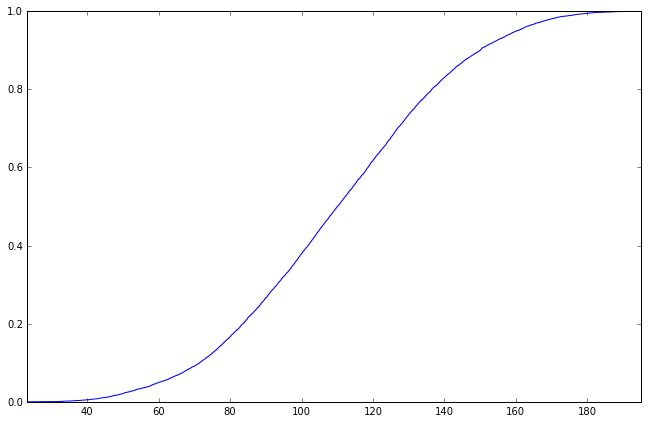

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()

Построим абсолютные гистограммы.

[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


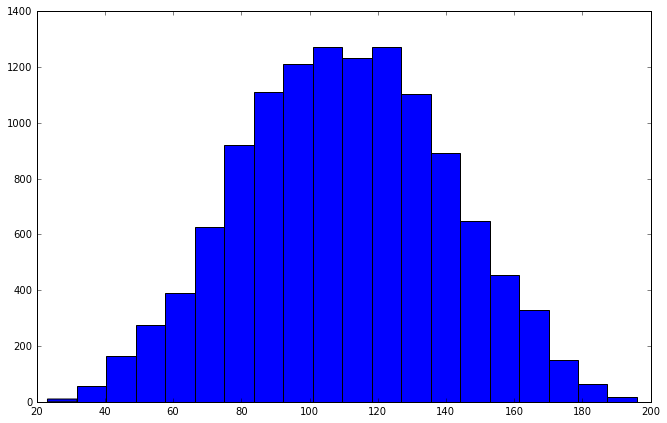

[   2.    8.   19.   24.   43.   62.  101.  115.  114.  110.  132.  130.
   99.   81.   72.   49.   34.   15.    6.    4.]


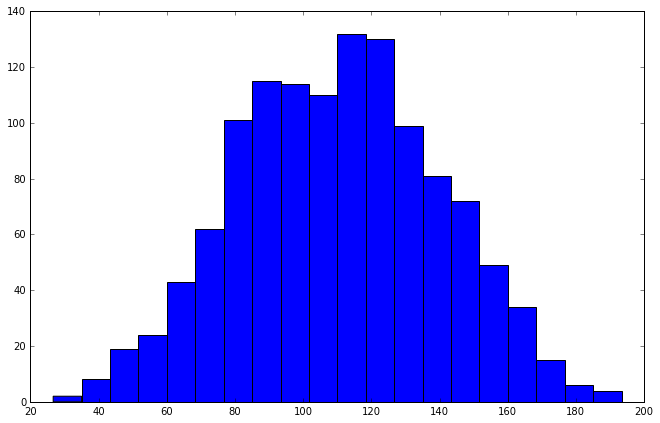

[   7.   12.   30.   35.   60.   91.  116.  101.  120.  106.  121.   90.
   81.   88.   53.   50.   31.   19.    6.    3.]


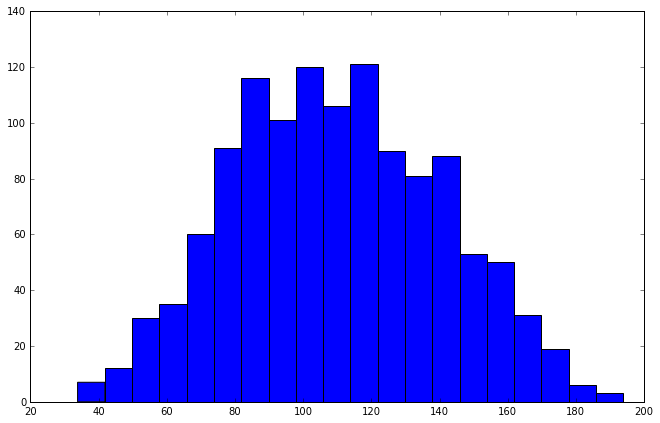

[   6.   13.   27.   35.   50.   73.   92.  102.  119.   96.  110.  122.
  120.   77.   62.   45.   32.   18.   16.    5.]


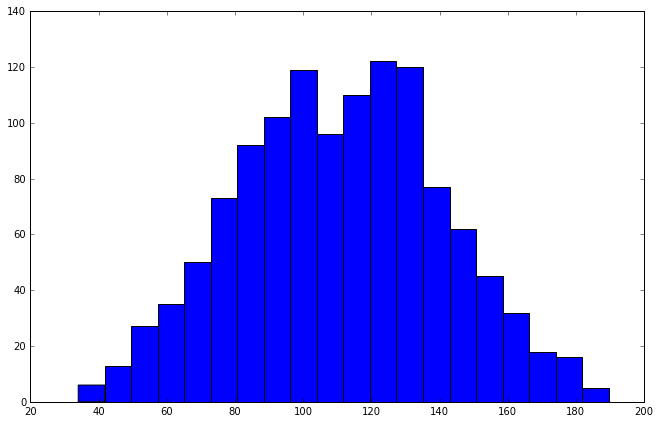

[   8.   14.   22.   28.   50.   70.   87.  122.  134.  104.  118.  103.
   99.   89.   64.   54.   31.   14.    7.    2.]


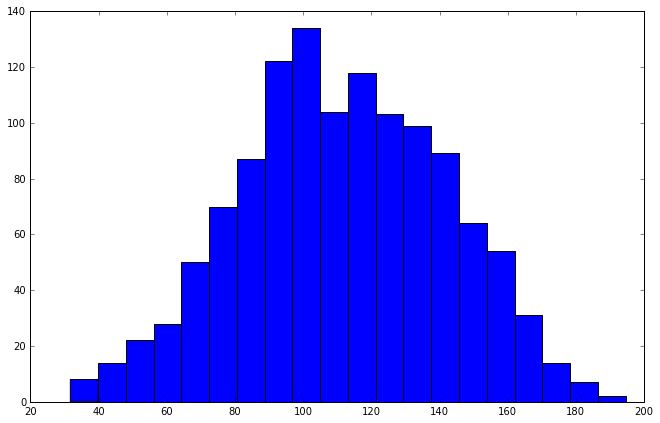

[   2.    7.   14.   30.   40.   57.   76.   86.  115.  124.  119.  122.
  129.   88.   72.   41.   44.   32.   14.    8.]


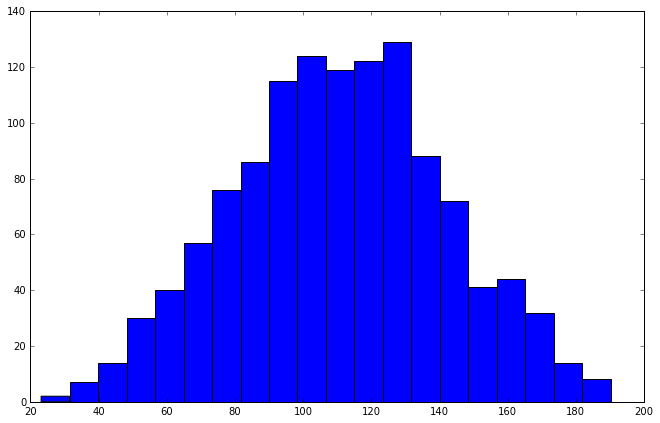

[   5.   10.   23.   17.   35.   70.   96.  101.  101.  112.  146.  106.
  106.   87.   68.   54.   44.   21.   14.    4.]


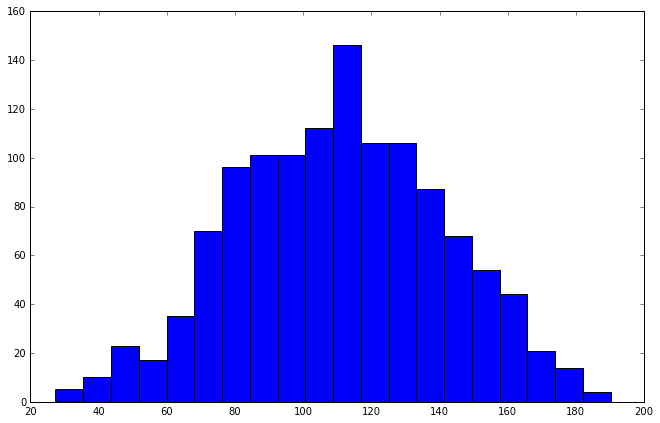

[   8.   15.   29.   30.   53.   76.  100.  100.  141.  116.  110.  107.
  107.   85.   59.   39.   21.   20.    3.    1.]


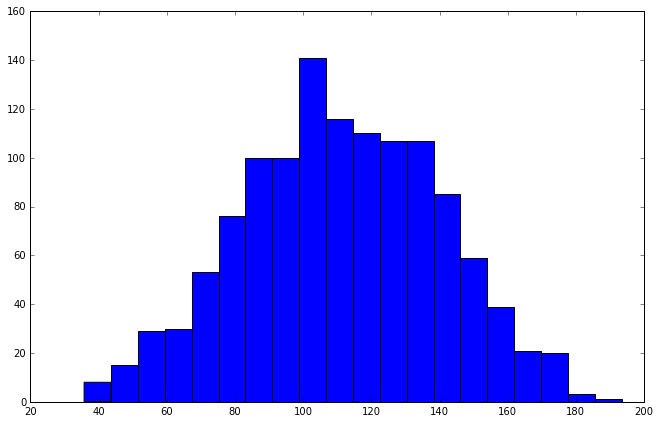

[   8.   19.   26.   31.   57.   90.  110.  128.  110.  116.  107.  123.
   93.   86.   51.   32.   18.   10.    4.    1.]


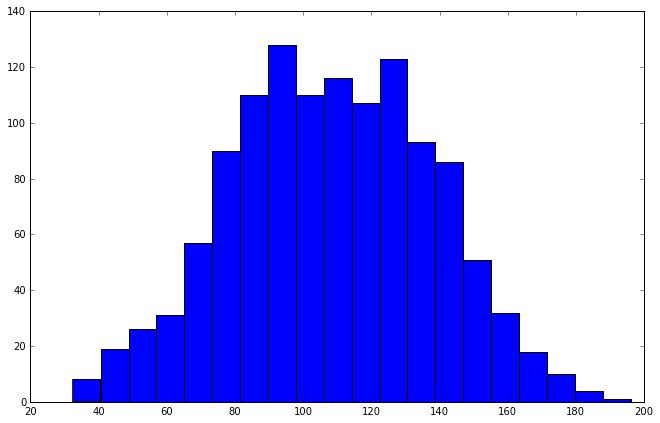

[   4.    2.   25.   30.   48.   57.   97.  105.   94.  111.  138.  122.
  113.   82.   67.   52.   41.   20.    8.    4.]


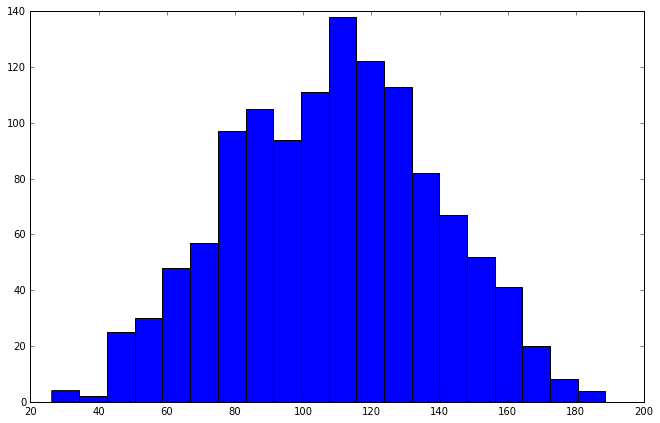

[   5.   17.   29.   30.   45.   68.   79.  101.  125.  111.   95.  129.
  122.   87.   52.   39.   43.   27.    7.    9.]


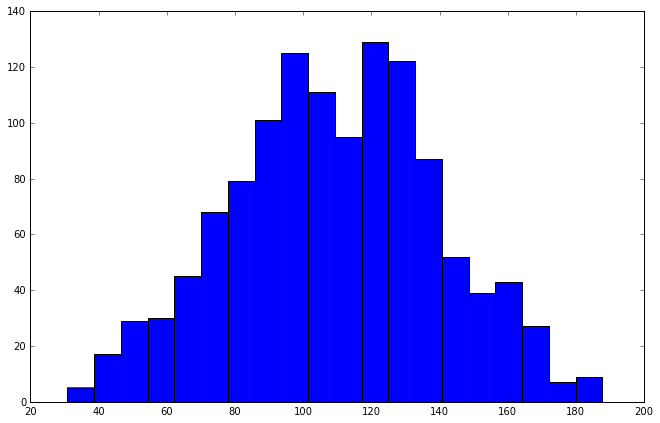

In [6]:
num_bins = 20

for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins)
    print(n)
    plt.show()

Построим относительные гистограммы.

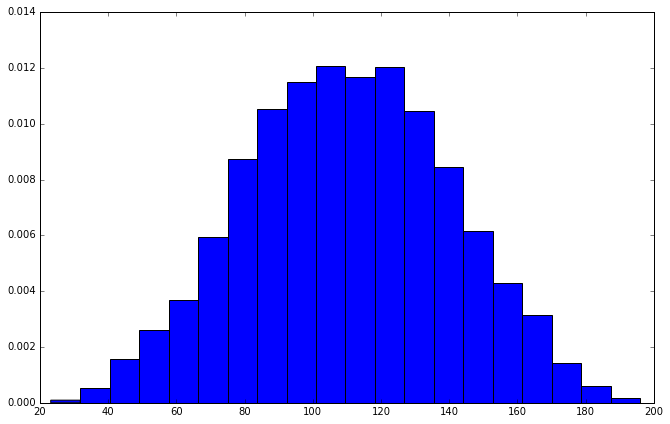

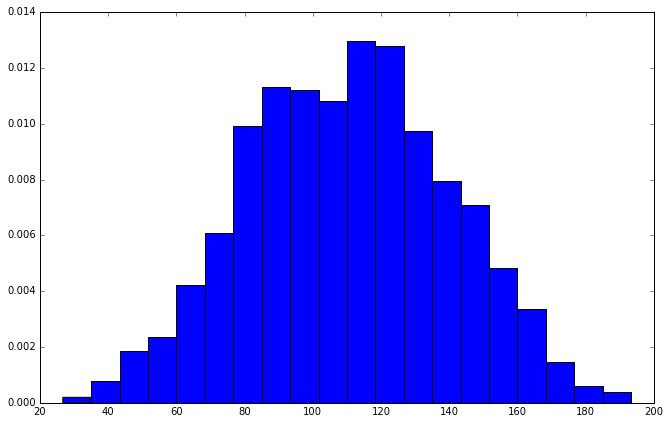

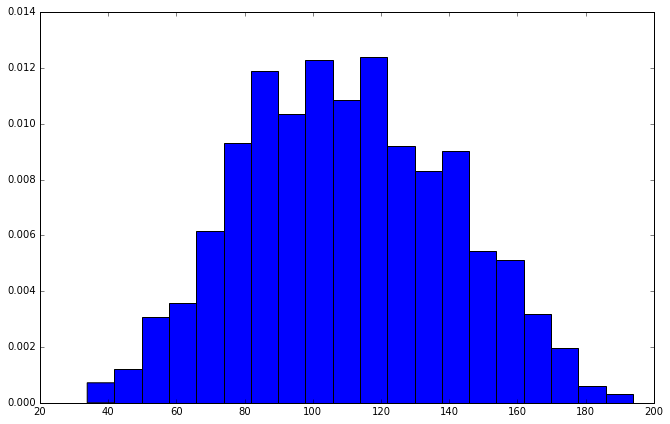

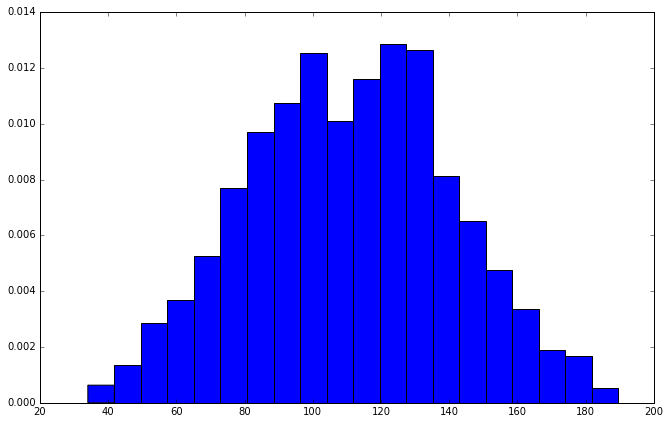

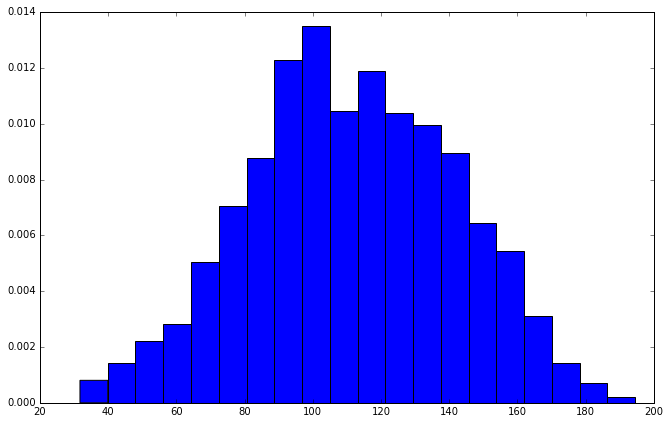

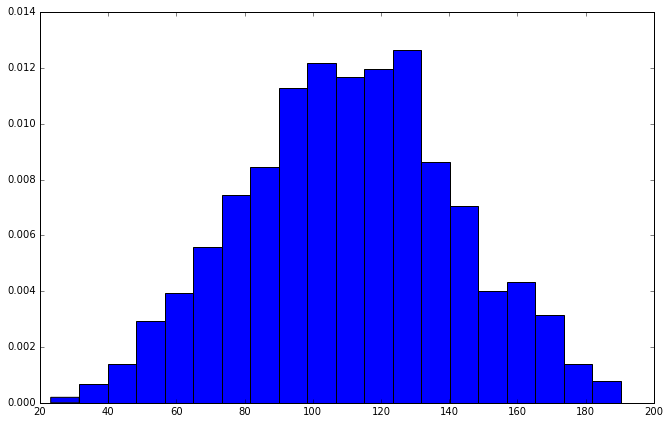

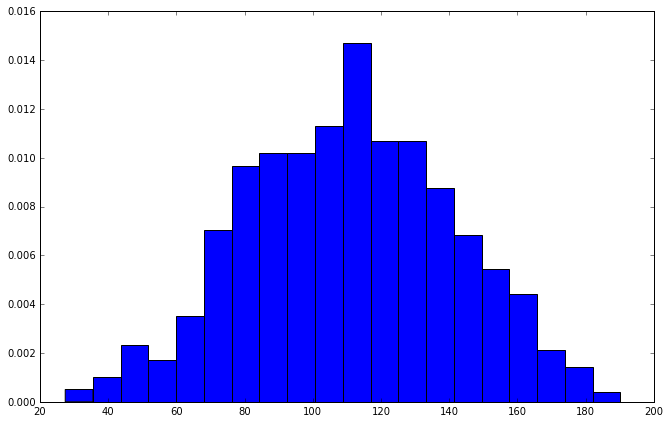

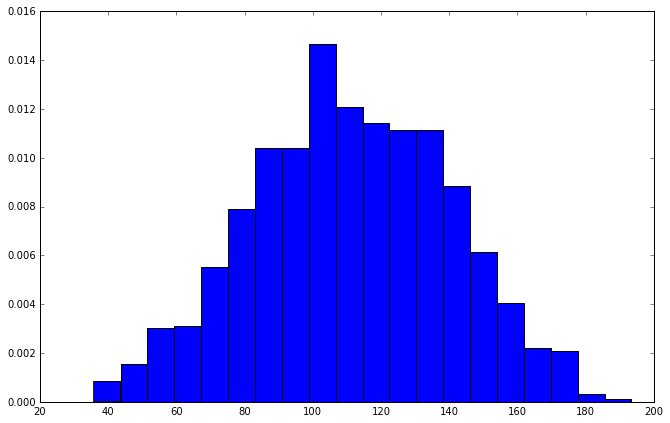

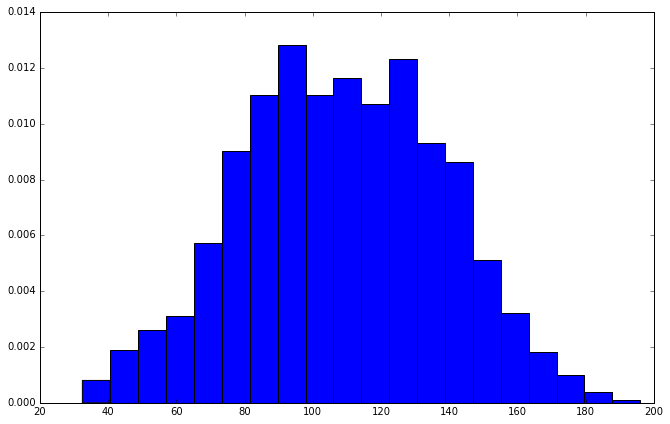

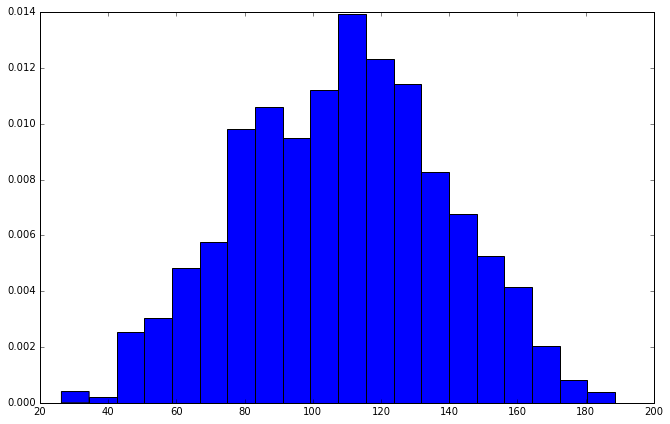

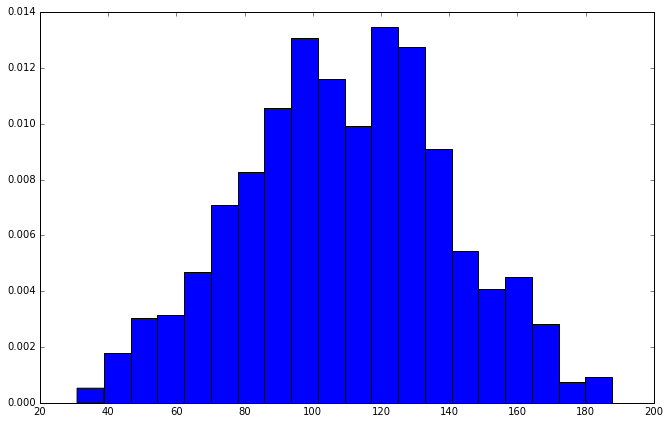

In [7]:
num_bins = 20

for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins, normed=True)
    plt.show()

# 1.3. Определение точечных оценок

Составим таблицу характеристик для всей выборки (подвыборка $0$) и для каждой подвыборки (подвыборки $1-10$).

In [8]:
import pandas as pd
import scipy.stats as st

d = {}

for i in range(len(samples)):
    s = samples[i]
    stat = {}
    stat[r'$\bar{x}$'] = s.mean()
    stat[r'$x_{med}$'] = s.median()
    stat[r'$x_{mid}$'] = s.mid()
    stat[r'$x_{mode}$'] = s.mode()
    stat[r'$s^2$'] = s.variance()
    stat[r'$s$'] = s.std()
    stat[r'$\hat{m}_3$'] = s.moment(3)
    stat[r'$\hat{m}_4$'] = s.moment(4)
    stat[r'$As$'] = s.skewness()
    stat[r'$Ex$'] = s.kurtosis()
    d[i] = pd.Series(stat)

In [9]:
keys = [r'$\bar{x}$', r'$x_{med}$', r'$x_{mid}$', r'$x_{mode}$', r'$s^2$', r'$s$',
        r'$\hat{m}_3$', r'$\hat{m}_4$', r'$As$', r'$Ex$']

df = pd.DataFrame(d, index=keys).transpose()
#df.columns = ['x_avg', 'x_med', 'x_mid', 'x_mode', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
#df.to_csv('table.csv')
df

,$\bar{x}$,$x_{med}$,$x_{mid}$,$x_{mode}$,$s^2$,$s$,$\hat{m}_3$,$\hat{m}_4$,$As$,$Ex$
0,110.146511,110.0465,109.59490,101.0970,902.224343,30.037050,89.286287,2.078277e+06,0.003295,-0.446862
1,110.474847,110.7580,110.03805,111.6250,884.304639,29.737260,292.141126,2.014530e+06,0.011109,-0.423858
2,109.837839,108.7645,113.86900,102.3580,928.645985,30.473693,2874.941577,2.104416e+06,0.101591,-0.559767
3,110.900388,111.5830,111.82450,120.2940,899.365765,29.989428,338.341882,2.051342e+06,0.012544,-0.463906
4,111.497314,111.1150,113.14630,101.4430,911.681763,30.194068,-743.069514,2.123482e+06,-0.026994,-0.445170
5,110.540863,110.7460,106.70490,107.0160,958.383094,30.957763,-285.938705,2.395518e+06,-0.009637,-0.391919
6,110.729166,110.6830,108.79755,100.2140,919.871578,30.329385,-101.970285,2.188505e+06,-0.003655,-0.413615
7,111.253898,110.0425,114.60570,105.1220,835.417080,28.903582,-803.033726,1.771894e+06,-0.033257,-0.461186
8,108.344494,107.7045,114.23380,58.0896,864.911654,29.409380,-233.409207,1.906901e+06,-0.009176,-0.450913
9,108.636376,109.5545,107.45135,112.0490,890.353129,29.838786,-378.374453,1.975947e+06,-0.014242,-0.507411


Каждую характеристику изобразим на графиках. Красной точкой отмечена характеристика всей выборки, а синими - характеристики каждой из подвыборок.

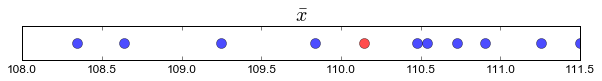

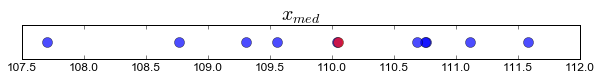

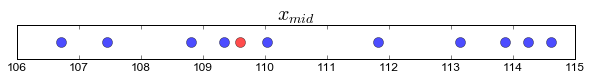

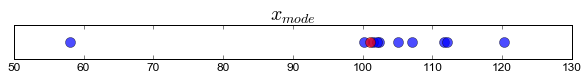

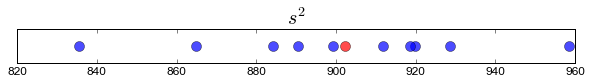

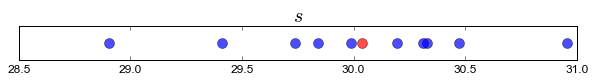

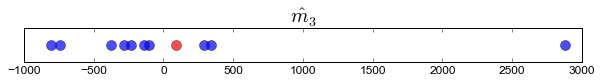

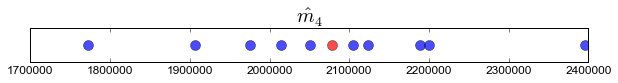

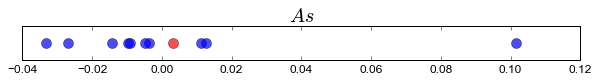

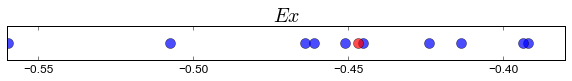

In [10]:
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

size = len(d) - 1

for i in range(len(keys)):
    key = keys[i]
    y = np.zeros(size)
    plt.figure(figsize=(10, 0.6))
    plt.title(key, fontsize=20)
    plt.plot([d[i][key] for i in range(1, size + 1)], y, marker='o', linestyle='None', alpha=0.7, markersize=10)
    plt.plot(d[0][key], 0, marker='o', color='r', alpha=0.7, markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)
    plt.show()

In [11]:
print(samples[0].percentile(2.5), end=' -- ')
print(samples[0].percentile(97.5))

51.46851 -- 167.7943


Получили границы интерквантильного промежутка для $P = 0.95$:
$$J_{0.95} \approx [51, 168]$$

# 1.4. Определение интервальных оценок

Будем определять интервальные оценки с вероятностью $Q = 0.8$.

In [12]:
q = 0.8

### Математическое ожидание

Найдем интервальные оценки математического ожидания для всей выборки (первая строка) и для каждой подвыборки. Изобразим оценки на одном графике.

In [13]:
for sample in samples:
    print(sample.interval_mean(0.8))

(109.79798341004171, 110.49503826208947)
(109.38317437195843, 111.56652021820551)
(108.71913077175471, 110.95654644136006)
(109.79945772534144, 112.00131801236348)
(110.38887154889876, 112.60575681175699)
(109.4043847030441, 111.67734136252967)
(109.61575588690648, 111.84257624424104)
(110.19282959492227, 112.31496581491382)
(107.26485808602493, 109.42413060249967)
(107.54097591441757, 109.73177588886111)
(108.13724684074404, 110.36259988056744)


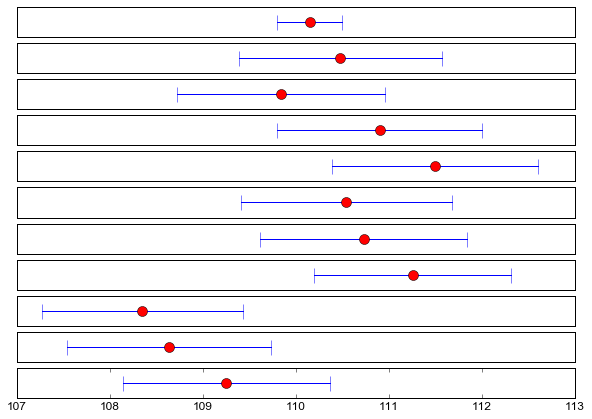

In [14]:
fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_mean(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.mean(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

### Дисперсия

Найдем интервальные оценки дисперсии для всей выборки (первая строка) и для каждой подвыборки. Изобразим оценки на одном графике.

In [15]:
for sample in samples:
    print(sample.interval_variance(0.8))

(887.6282171287985, 917.24305488751872)
(840.39531916909971, 932.36410145986599)
(882.53493713294881, 979.11527455965404)
(854.7085991961593, 948.2437573396337)
(866.41305786261262, 961.22909511901514)
(910.79547803922549, 1010.4685118134049)
(874.19621571123469, 969.86400396313581)
(793.93522683130243, 880.8196422533332)
(821.96527458272715, 911.91716230077134)
(846.14347682090818, 938.74130956875558)
(873.04452801522621, 968.58628115892873)


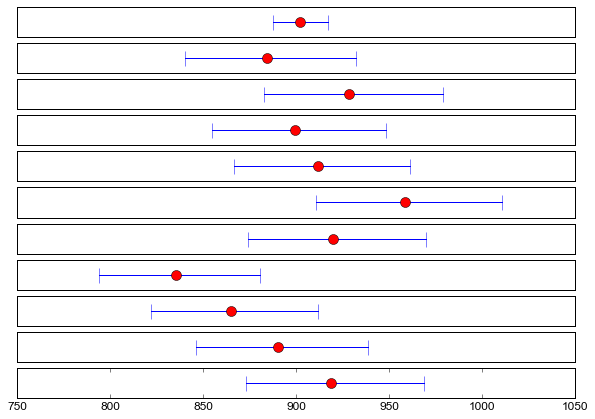

In [16]:
fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_variance(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.variance(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

### Толерантные пределы

In [17]:
p = 0.95

In [18]:
for sample in samples:
    print(sample.parametric_confidence_interval(0.8))

(53.496635457991722, 166.79638621413946)
(54.390374730746068, 166.55931985941788)
(52.364452998551464, 167.31122421456331)
(54.340327505418102, 167.46044823228681)
(54.551301290631066, 168.44332707002468)
(52.154521891294664, 168.9272041742791)
(53.527946455173627, 167.93038567597389)
(56.74174113912342, 165.76605427071269)
(52.878402970185071, 163.81058571833952)
(52.360426183538046, 164.91232561974064)
(52.086395318377527, 166.41345140293396)


# 2. Идентификация закона и параметров распределения

## 2.1. Начальный выбор распределения

Остановим выбор на трех основных распределениях:
* Нормальное
* Логнормальное
* Гамма (Эрланга)

<img src="dist_info.png" width=1000px>

## 2.2. Определение параметров теоретических распределений

### Нормальное распределение

#### Метод моментов

Для нормального распределения оценим параметры $\mu$ и $\sigma$ следующим образом:
$$ \mu = M[x] $$
$$ \sigma = \sqrt{D[x]} $$


In [19]:
s = samples[0]

norm_mu_mm = s.mean()
norm_sigma_mm = math.sqrt(s.variance())

$$ \mu = 110.15 $$
$$ \sigma = 30.04 $$

#### Метод максимального праводоподобия

In [20]:
loc, scale = st.norm.fit(x)
xes = np.linspace(0, 200, num)

norm_mu = loc
norm_sigma = scale

$$ \mu = 110.15 $$
$$ \sigma = 30.04 $$

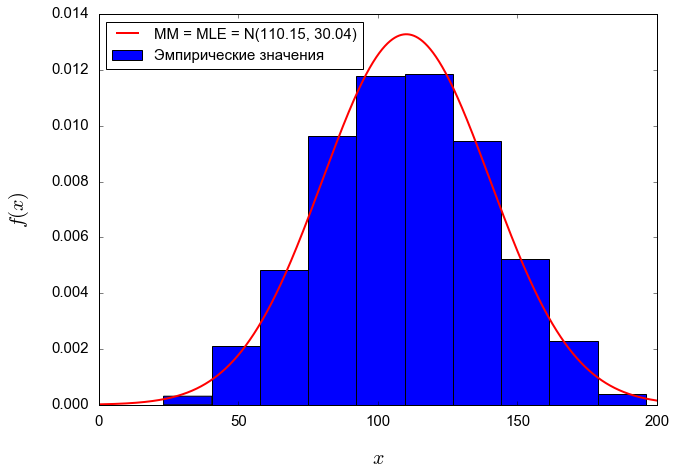

In [21]:
norm_pdf = st.norm.pdf(xes, loc=norm_mu, scale=norm_sigma)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, norm_pdf, label='MM = MLE = N({0:.2f}, {1:.2f})'.format(norm_mu, norm_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_norm.png')
plt.show()

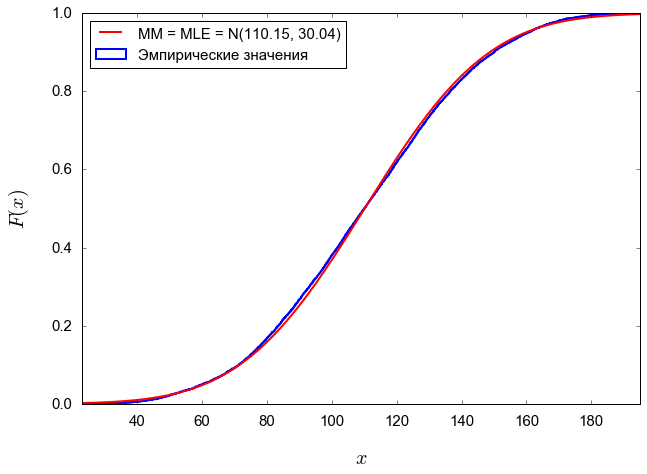

In [22]:
norm_cdf = st.norm.cdf(xes, loc=norm_mu, scale=norm_sigma)

plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, norm_cdf, label='MM = MLE = N({0:.2f}, {1:.2f})'.format(norm_mu, norm_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_norm.png')
plt.show()

Оценки, полученные с помощью метода моментов и метода максимального правдоподобия, совпали.

### Логнормальное распределение

#### Метод моментов

Для логнормального распределения оценим параметры $\mu$ и $\sigma$ следующим образом:
$$ \mu = \log{\frac{M[x]}{\sqrt{1 + \frac{D[x]}{M[x]^2}}}} $$
$$ \sigma = \sqrt{\log{1 + \frac{D[x]}{M[x]^2}}} $$


In [23]:
logn_mu_mm = math.log(s.mean()/math.sqrt(1 + s.variance()/(s.mean()**2)))
logn_sigma_mm = math.sqrt(math.log(1 + s.variance() / (s.mean() ** 2)))

$$ \mu = 4.67 $$
$$ \sigma = 0.27 $$

#### Метод максимального правдоподобия

In [24]:
shape, loc, scale = st.lognorm.fit(x)

logn_mu_mle = math.log(scale)
logn_loc_mle = loc
logn_sigma_mle = shape

$$ \mu = 7.09 $$
$$ \sigma = 0.02 $$

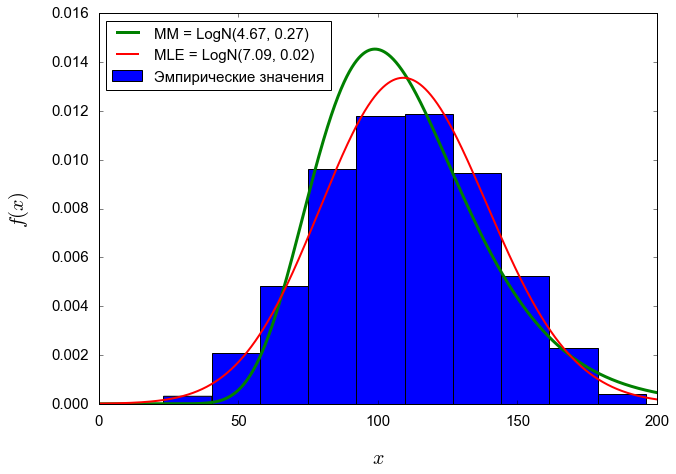

In [25]:
logn_pdf_mle = st.lognorm.pdf(xes, logn_sigma_mle, loc=loc, scale=math.exp(logn_mu_mle))
logn_pdf_mm = st.lognorm.pdf(xes, logn_sigma_mm, scale=math.exp(logn_mu_mm))

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, logn_pdf_mm, label='MM = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mm, logn_sigma_mm), color='g', linewidth=3)
plt.plot(xes, logn_pdf_mle, label='MLE = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mle, logn_sigma_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_lognorm.png')
plt.show()

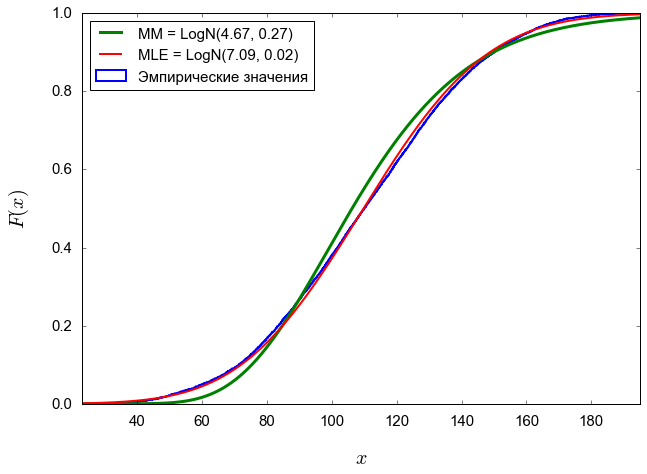

In [26]:
logn_cdf_mm = st.lognorm.cdf(xes, logn_sigma_mm, scale=math.exp(logn_mu_mm))
logn_cdf_mle = st.lognorm.cdf(xes, logn_sigma_mle, loc=loc, scale=math.exp(logn_mu_mle))

plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, logn_cdf_mm, label='MM = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mm, logn_sigma_mm), color='g', linewidth=3)
plt.plot(xes, logn_cdf_mle, label='MLE = LogN({0:.2f}, {1:.2f})'.format(logn_mu_mle, logn_sigma_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_lognorm.png')
plt.show()

### Гамма-распределение

#### Метод моментов

Найдем параметры $k$ и $\theta$ из системы уравнений:
$$ k \cdot \theta = M[x] $$
$$ k \cdot \theta^2 = D[x] $$



In [27]:
gamma_k_mm = 13.44
gamma_theta_mm = 8.18

$$ k \approx 13.44 $$
$$ \theta \approx 8.18 $$


#### Метод максимального правдоподобия

In [28]:
shape, loc, scale = st.gamma.fit(x)

gamma_k_mle = (shape*scale+loc)*scale*2.4
gamma_theta_mle = s.mean() / gamma_k_mle

$$ k \approx 13.09 $$
$$ \theta \approx 8.42 $$


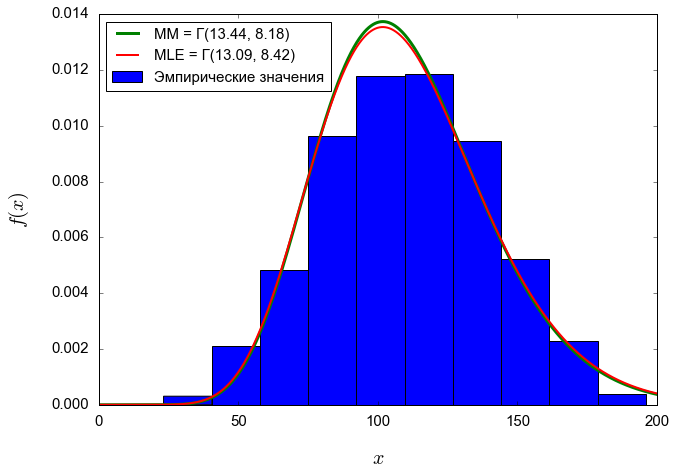

In [29]:
gamma_pdf_mm = st.gamma.pdf(xes, gamma_k_mm, scale=gamma_theta_mm)
gamma_pdf_mle = st.gamma.pdf(xes, gamma_k_mle, scale=gamma_theta_mle)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, gamma_pdf_mm, label='MM = Г({0:.2f}, {1:.2f})'.format(gamma_k_mm, gamma_theta_mm), color='g', linewidth=3)
plt.plot(xes, gamma_pdf_mle, label='MLE = Г({0:.2f}, {1:.2f})'.format(gamma_k_mle, gamma_theta_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_gamma`.png')
plt.show()

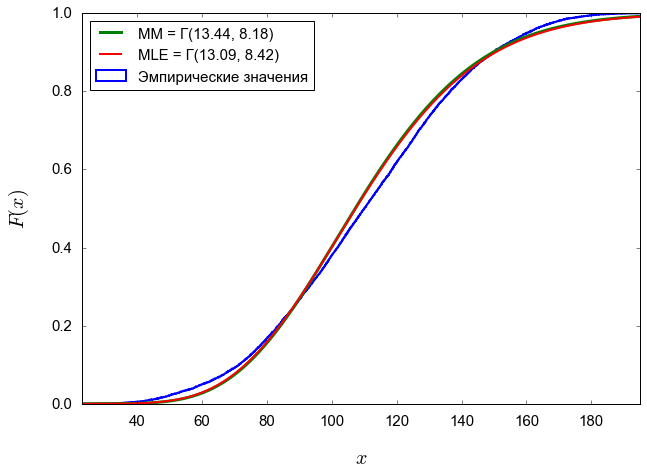

In [30]:
gamma_cdf_mm = st.gamma.cdf(xes, gamma_k_mm, scale=gamma_theta_mm)
gamma_cdf_mle = st.gamma.cdf(xes, gamma_k_mle, scale=gamma_theta_mle)

plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, gamma_cdf_mm, label='MM = Г({0:.2f}, {1:.2f})'.format(gamma_k_mm, gamma_theta_mm), color='g', linewidth=3)
plt.plot(xes, gamma_cdf_mle, label='MLE = Г({0:.2f}, {1:.2f})'.format(gamma_k_mle, gamma_theta_mle), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_gamma.png')
plt.show()

## 2.3. Проверка статистических гипотез

Проверим гипотезы по следующим критериям: "хи-квадрат", Колмагорова-Смирнова и "омега-квадрат" Мизеса.

In [31]:
from scipy.stats import kstest

def chi2test(rvc, cdf, args=()):
    values, edges = np.histogram(rvc, bins='auto')
    n = np.sum(values)
    exp_values = np.array([cdf(edges[i + 1], *args) - cdf(edges[i], *args) for i in range(len(edges) - 1)])
    statistic = np.sum(np.square(values - n * exp_values) / (n * exp_values * (1 - exp_values)))
    return statistic, len(values)


def omega2test(rvc, cdf, args=()):
    n = len(rvc)
    sorted_rvc = np.sort(rvc)
    statistic = [cdf(sorted_rvc[i], *args) - ((i - 0.5) / n) for i in range(1, len(rvc))]
    statistic = np.square(statistic)
    statistic = np.sum(statistic) + 1 / (12 * n)
    return statistic

Рассчитаем критические значения при уровне значимости $\alpha = 0.05$:

In [32]:
alpha = 0.05

In [33]:
chi2_crit = st.chi2.ppf(1 - alpha, num/10)
print('chi2_crit = {}'.format(chi2_crit))

chi2_crit = 1302.370816450486


In [34]:
ks_crit = np.sqrt(-np.log(0.5 * alpha)/(num)) - 1/(6 * num)
print('ks_crit = {}'.format(ks_crit))

ks_crit = 0.01737504686857078


In [35]:
mises_crit = 0.4614
print('mises_crit = {}'.format(mises_crit))

mises_crit = 0.4614


### Нормальное распределение

In [36]:
chi2test(s.values, st.norm.cdf, (norm_mu, norm_sigma))

(134.94626640491114, 47)

In [37]:
kstest(s.values, st.norm.cdf, (norm_mu, norm_sigma))

KstestResult(statistic=0.016458823362101527, pvalue=0.0026942409550408794)

In [38]:
omega2test(s.values, st.norm.cdf, (norm_mu, norm_sigma))

1.0463387337559202

### Логнормальное распределение

#### Метод моментов

In [39]:
chi2test(s.values, st.lognorm.cdf, (logn_mu_mm, math.exp(logn_sigma_mm)))

(214032.88563318996, 47)

In [40]:
kstest(s.values, st.lognorm.cdf, (logn_mu_mm, math.exp(logn_sigma_mm)))

KstestResult(statistic=0.77998047084357236, pvalue=0.0)

In [41]:
omega2test(s.values, st.lognorm.cdf, (logn_mu_mm, math.exp(logn_sigma_mm)))

2320.9140813422009

#### Метод максимального правдоподобия

In [42]:
chi2test(s.values, st.lognorm.cdf, (logn_mu_mle, logn_loc_mle, math.exp(logn_sigma_mle)))

(3902277.1464217473, 47)

In [43]:
kstest(s.values, st.lognorm.cdf, (logn_mu_mle, logn_loc_mle, math.exp(logn_sigma_mle)))

KstestResult(statistic=0.8379432602062995, pvalue=0.0)

In [44]:
omega2test(s.values, st.lognorm.cdf, (logn_mu_mle, logn_loc_mle, math.exp(logn_sigma_mle)))

2425.1474974841854

### Гамма распределение

#### Метод моментов

In [45]:
chi2test(s.values, st.lognorm.cdf, (gamma_k_mm, gamma_theta_mm))

(383157.88081084646, 47)

In [46]:
kstest(s.values, st.lognorm.cdf, (gamma_k_mm, gamma_theta_mm))

KstestResult(statistic=0.59666760275912623, pvalue=0.0)

In [47]:
omega2test(s.values, st.lognorm.cdf, (gamma_k_mm, gamma_theta_mm))

1171.8982857000703

#### Метод максимального правдоподобия

In [48]:
chi2test(s.values, st.lognorm.cdf, (gamma_k_mle, gamma_theta_mle))

(372827.43592794403, 47)

In [49]:
kstest(s.values, st.lognorm.cdf, (gamma_k_mle, gamma_theta_mle))

KstestResult(statistic=0.59914628172850737, pvalue=0.0)

In [50]:
omega2test(s.values, st.lognorm.cdf, (gamma_k_mle, gamma_theta_mle))

1181.438917305567

### Вывод

Таким образом, из результатов видно, что принять мы можем только гипотезу о том, что исходная выборка подчиняется нормальному распределению $N(\mu, \sigma)$ с параметрами:
$$ \mu = 110.15 $$
$$ \sigma = 30.04 $$

Остальные гипотезы мы должны отвергнуть.